In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Loading the dataset
ipl = pd.read_csv("datasets/matches.csv")

In [44]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [45]:
# Having a glance at the first 2 rows
ipl.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


### COMPREHENSIVE OVERVIEW

In [29]:
print("="*50)
print("COMPREHENSIVE DATASET OVERVIEW")
print("="*50)

# Basic Info
print("Dataset Shape:", ipl.shape)
print(f"Total cells: {ipl.size:,}")
print(f"Total memory usage: {ipl.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*30)
print("DATA TYPES & STRUCTURE")
print("="*30)
print(ipl.dtypes)
print(f"\nData type distribution:")
print(ipl.dtypes.value_counts())

# Detailed info
print("\n" + "="*30)
print("DETAILED COLUMN INFO")
print("="*30)
ipl.info()

print("\n" + "="*30)
print("MISSING VALUES ANALYSIS")
print("="*30)
missing = ipl.isnull().sum()
missing_pct = (missing / len(ipl)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])  # Only show columns with missing values

print("\n" + "="*30)
print("UNIQUE VALUES COUNT")
print("="*30)
print(ipl.nunique().sort_values(ascending=False))

print("\n" + "="*30)
print("STATISTICAL SUMMARY")
print("="*30)
print(ipl.describe(include='all'))

# Additional insights for categorical columns
print("\n" + "="*30)
print("CATEGORICAL COLUMNS PREVIEW")
print("="*30)
categorical_cols = ipl.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"\n{col}:")
    print(ipl[col].value_counts().head())

# Numerical columns distribution
print("\n" + "="*30)
print("NUMERICAL COLUMNS DISTRIBUTION")
print("="*30)
numerical_cols = ipl.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    print(f"\n{col}: Min={ipl[col].min()}, Max={ipl[col].max()}, "
          f"Median={ipl[col].median()}, Skew={ipl[col].skew():.2f}")

print("\n" + "="*30)
print("DUPLICATE ROWS")
print("="*30)
duplicates = ipl.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(ipl))*100:.2f}%")

COMPREHENSIVE DATASET OVERVIEW
Dataset Shape: (636, 17)
Total cells: 10,812
Total memory usage: 0.54 MB

DATA TYPES & STRUCTURE
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

Data type distribution:
object     12
int64       4
float64     1
Name: count, dtype: int64

DETAILED COLUMN INFO
<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 1 to 636
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           636 non-null    int64  
 1   city             629 non-null    object 


Getting the frequency of most man of the match awards

In [32]:
ipl["player_of_match"].value_counts()

player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
                  ..
AD Mathews         1
LR Shukla          1
R Bhatia           1
A Singh            1
BCJ Cutting        1
Name: count, Length: 201, dtype: int64

Getting the top 10 players with most man of the match awards

In [33]:
ipl["player_of_match"].value_counts()[0:10]

player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: count, dtype: int64

Who are the top 10 players with the most Player of the Match awards?

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\1497922269.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette="coolwarm")


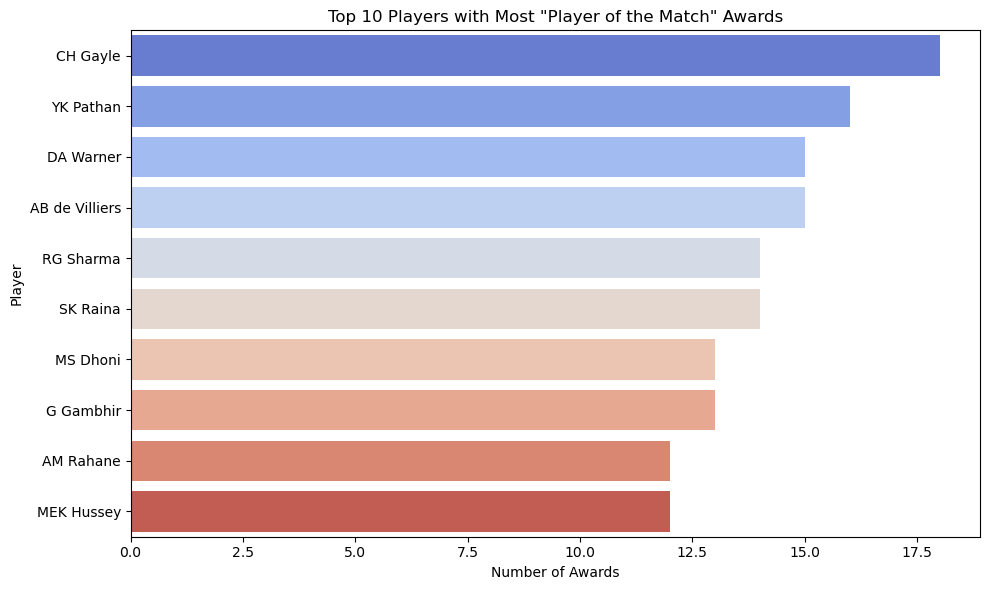

In [31]:
top_players = ipl['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette="coolwarm")
plt.title('Top 10 Players with Most "Player of the Match" Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

Getting the top 5 players with most man of the match awards

In [35]:
ipl["player_of_match"].value_counts()[0:5]

player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: count, dtype: int64

Making a bar plot for the top 5 players with most man of the match awards

In [ ]:
list(ipl["player_of_match"].value_counts()[0:5].keys()) # it will return the names. 

['CH Gayle', 'YK Pathan', 'DA Warner', 'AB de Villiers', 'RG Sharma']

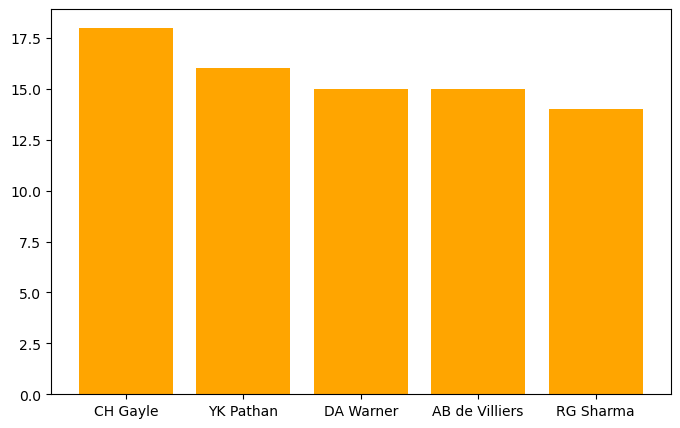

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(
    list(ipl["player_of_match"].value_counts()[0:5].keys()), 
    list(ipl["player_of_match"].value_counts()[0:5]), 
    color="orange"
);

Getting the frequency of result column

In [48]:
ipl["result"].value_counts()

result
normal       626
tie            7
no result      3
Name: count, dtype: int64

Finding out the number of toss wins w.r.t each team

In [49]:
ipl["toss_winner"].value_counts()

toss_winner
Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

Extracting the records where a team won batting first

In [ ]:
batting_first = ipl[ipl["win_by_runs"]!=0]

In [57]:
# Looking at the head
batting_first.head(3)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN


Making a histogram

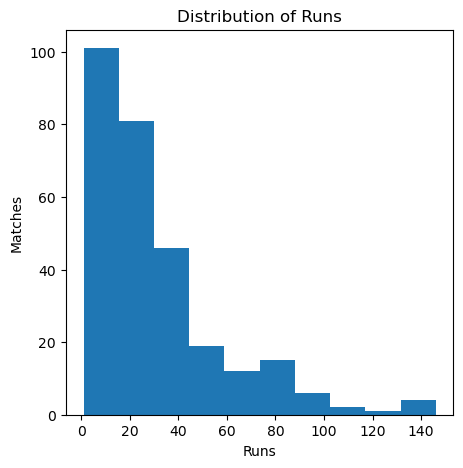

In [63]:
plt.figure(figsize=(5,5))
plt.hist(batting_first["win_by_runs"])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.ylabel("Matches")
plt.show()

Finding out the number of wins w.r.t each team after batting first

In [65]:
batting_first["winner"].value_counts()

winner
Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Rajasthan Royals               23
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: count, dtype: int64

Making a bar plot for top 3 teams with most wins after batting first

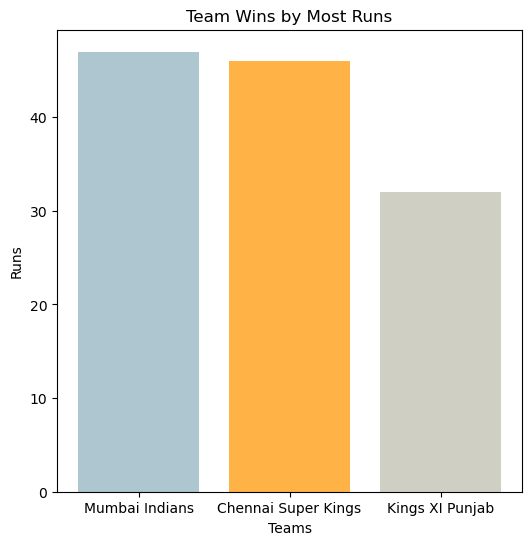

In [100]:
plt.figure(figsize=(6,6))
plt.bar(
    list(batting_first["winner"].value_counts()[0:3].keys()), 
    list(batting_first["winner"].value_counts()[0:3]), 
    color=["#aec6cf", "#ffb347", "#cfcfc4"]
)
plt.title("Team Wins by Most Runs")
plt.xlabel("Teams")
plt.ylabel("Runs");

Making a Pie Chart for all the teams with most wins after batting first

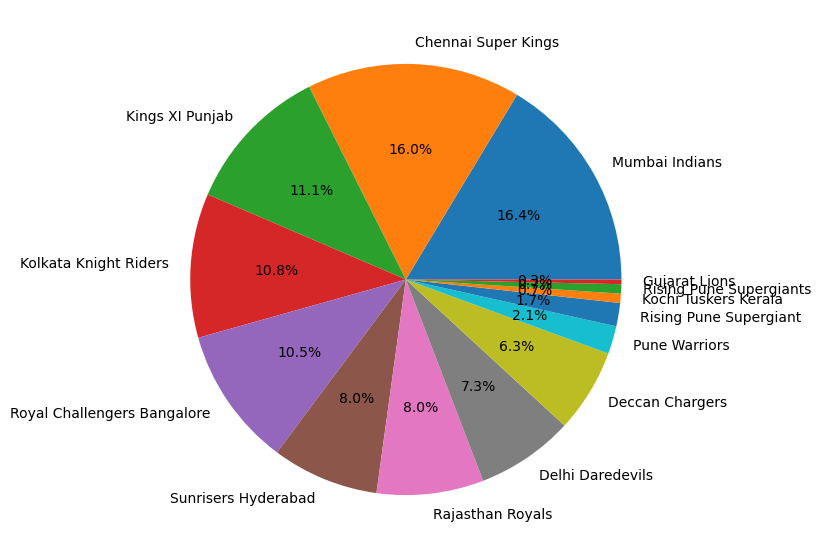

In [99]:
plt.figure(figsize=(7,7))
plt.pie(
    list(batting_first["winner"].value_counts()), 
    labels=list(batting_first["winner"].value_counts().keys()), 
    autopct="%0.1f%%"
);

Extracting those records where a team has won after batting second

In [80]:
batting_second = ipl[ipl["win_by_wickets"]!=0]
batting_second.head(3)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


Making a histogram for frequency of wins w.r.t number of wickets

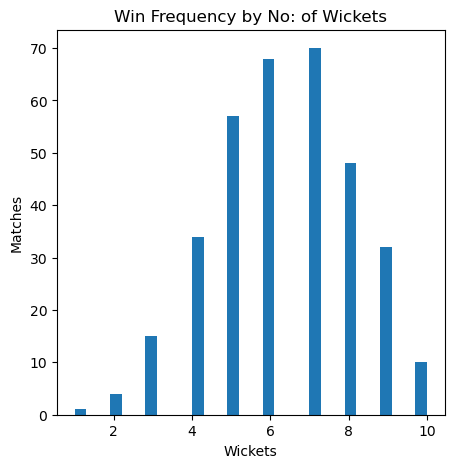

In [87]:
plt.figure(figsize=(5,5))
plt.hist(batting_second["win_by_wickets"], bins=30)
plt.title("Win Frequency by No: of Wickets")
plt.xlabel("Wickets")
plt.ylabel("Matches");

Finding out the frequency of number of wins w.r.t each team after batting second

In [86]:
batting_second["winner"].value_counts()

winner
Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: count, dtype: int64

Making a bar plot for top 3 teams with most wins after batting second

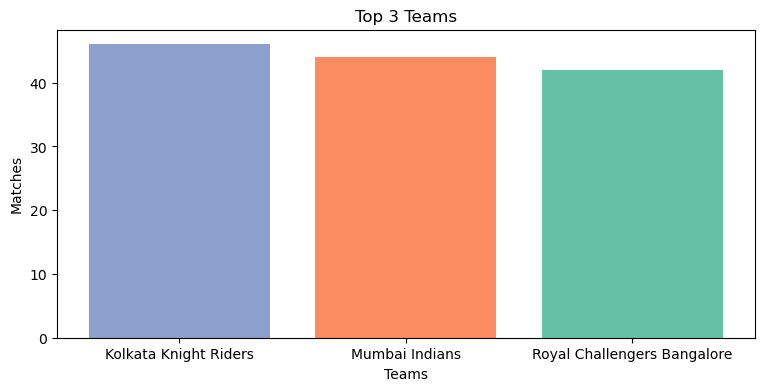

In [ ]:
plt.figure(figsize=(9, 4))
plt.bar(
    list(batting_second["winner"].value_counts()[0:3].keys()), 
    list(batting_second["winner"].value_counts()[0:3]), 
    color=["#8da0cb", "#fc8d62", "#66c2a5"]
)
plt.title("Top 3 Teams")
plt.xlabel("Teams")
plt.ylabel("Matches");

Making a Pie Chart for distribution of most wins after batting second

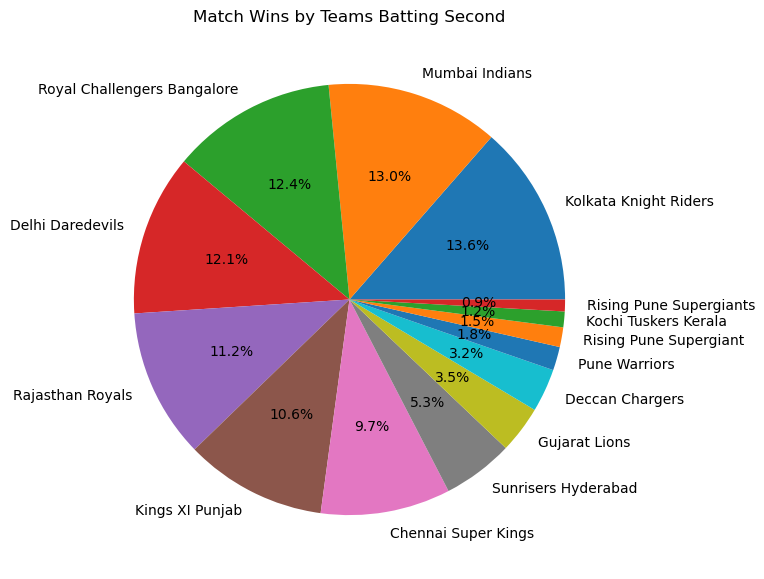

In [98]:
plt.figure(figsize=(7, 7))
plt.pie(
    batting_second["winner"].value_counts(), 
    labels=batting_second["winner"].value_counts().keys(), 
    autopct="%0.1f%%"
)
plt.title("Match Wins by Teams Batting Second")
plt.show()

Looking at the number of matches played each season

In [101]:
ipl["season"].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

Looking at the number of matches played in each city

In [102]:
ipl["city"].value_counts()

city
Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: count, dtype: int64

Finding out how many times a team has won the match after winning the toss

In [103]:
import numpy as np
np.sum(ipl["toss_winner"]==ipl["winner"])

325

In [104]:
325/636 

0.5110062893081762

51% of times, the team who wins the toss, also wins the match

 Which teams have won the most matches across all seasons?

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\3645663412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")


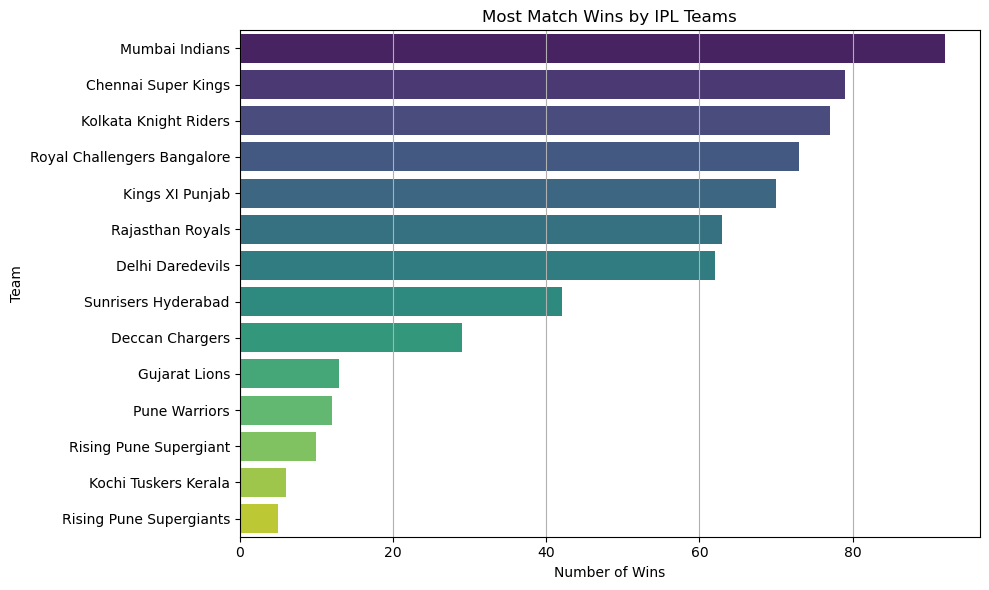

In [23]:
team_wins = ipl['winner'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")
plt.title('Most Match Wins by IPL Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

 How many matches are played each season?

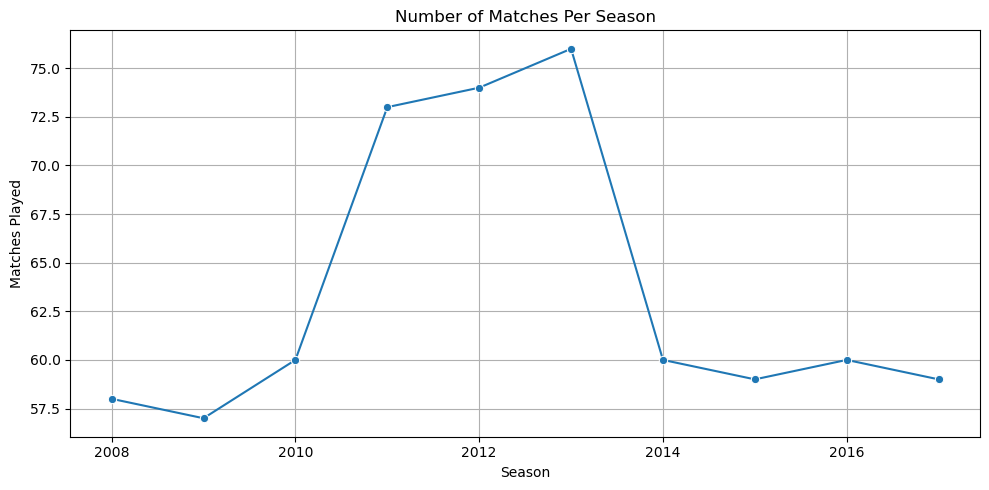

In [24]:
matches_per_season = ipl['season'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=matches_per_season.index, y=matches_per_season.values, marker='o')
plt.title('Number of Matches Per Season')
plt.xlabel('Season')
plt.ylabel('Matches Played')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
deliveries = pd.read_csv("datasets/deliveries.csv")

In [42]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [38]:
deliveries["match_id"].unique() # This gives total number of matches

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

If I want to focus on first match only

In [110]:
match_1 = deliveries[deliveries["match_id"]==1]

In [113]:
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
match_1.shape  # total number of balls bowled in this match is 248 

(248, 21)

In [116]:
srh = match_1[match_1["inning"]==1]

In [ ]:
srh["batsman_runs"].value_counts() # sunrises hyderabad 3s, 6s, 4s, dots and 1s

batsman_runs
1    57
0    32
4    17
6     9
2     9
3     1
Name: count, dtype: int64

In [118]:
srh["dismissal_kind"].value_counts()

dismissal_kind
caught    3
bowled    1
Name: count, dtype: int64

In [119]:
rcb = match_1[match_1["inning"]==2]

In [120]:
rcb["batsman_runs"].value_counts()

batsman_runs
0    49
1    44
4    15
6     8
2     7
Name: count, dtype: int64

In [121]:
rcb["dismissal_kind"].value_counts()

dismissal_kind
caught     6
bowled     2
run out    2
Name: count, dtype: int64

What are the most common types of dismissals?

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\1268527649.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissals.values, y=dismissals.index, palette="magma")


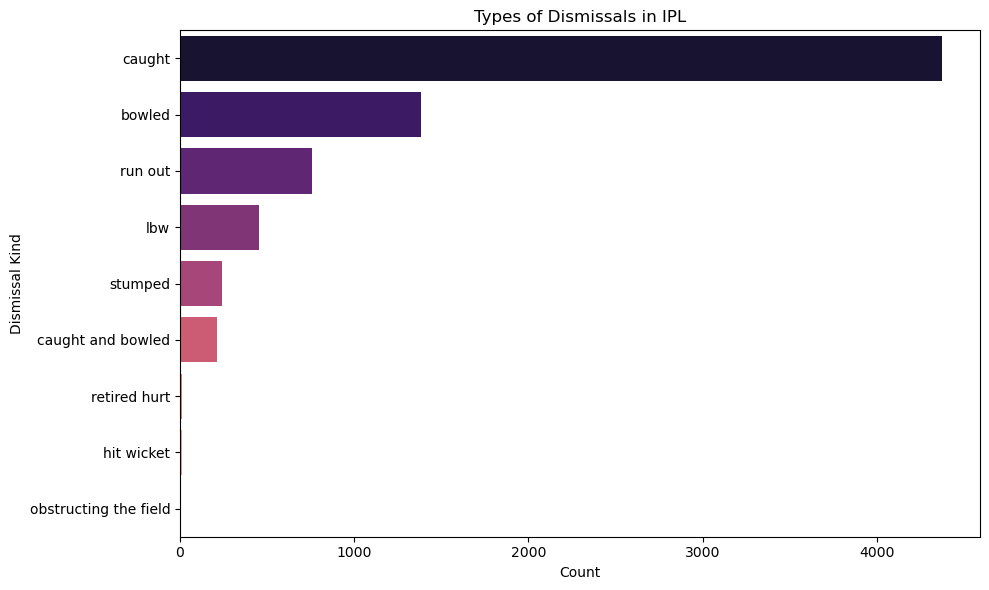

In [46]:
dismissals = deliveries['dismissal_kind'].dropna().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dismissals.values, y=dismissals.index, palette="magma")
plt.title('Types of Dismissals in IPL')
plt.xlabel('Count')
plt.ylabel('Dismissal Kind')
plt.tight_layout()
plt.show()

What are the top 10 run scorers in IPL?

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\640907167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="crest")


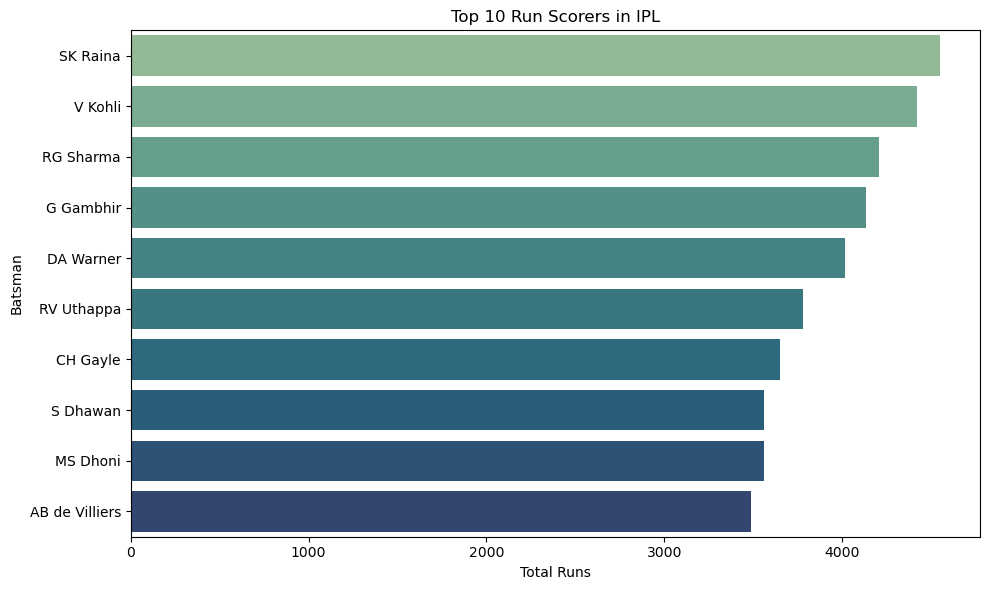

In [47]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="crest")
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

Which bowlers have taken the most wickets?

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\944045653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="rocket")


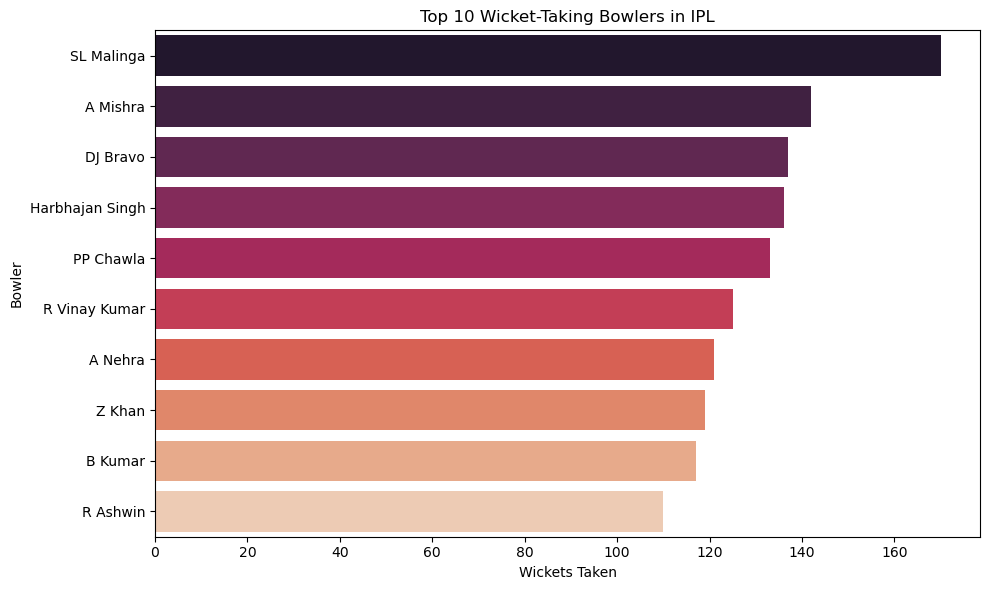

In [48]:
wicket_deliveries = deliveries[deliveries['player_dismissed'].notnull()]
top_bowlers = wicket_deliveries['bowler'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="rocket")
plt.title('Top 10 Wicket-Taking Bowlers in IPL')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

How does toss decision affect match results?

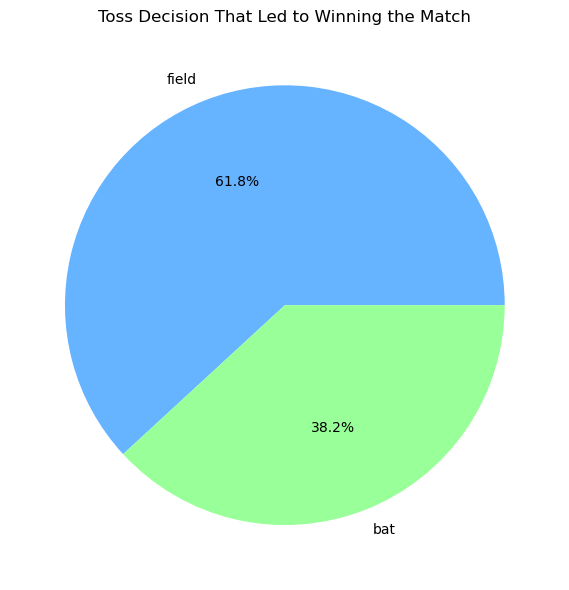

In [50]:
toss_win_match_win = ipl[ipl['toss_winner'] == ipl['winner']]
decision_effect = toss_win_match_win['toss_decision'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(decision_effect, labels=decision_effect.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Toss Decision That Led to Winning the Match')
plt.tight_layout()
plt.show()


Distribution of winning margins by runs and wickets

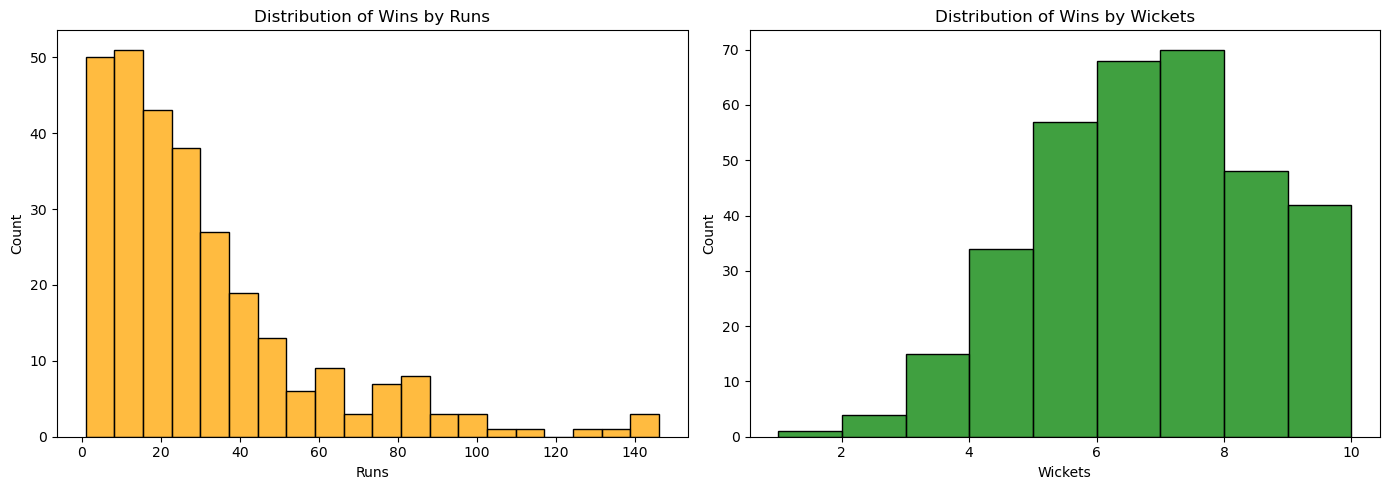

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(ipl[ipl['win_by_runs'] > 0]['win_by_runs'], bins=20, ax=axes[0], color='orange')
axes[0].set_title('Distribution of Wins by Runs')
axes[0].set_xlabel('Runs')

sns.histplot(ipl[ipl['win_by_wickets'] > 0]['win_by_wickets'], bins=9, ax=axes[1], color='green')
axes[1].set_title('Distribution of Wins by Wickets')
axes[1].set_xlabel('Wickets')

plt.tight_layout()
plt.show()

🗓️ Which team won the most matches in each season?

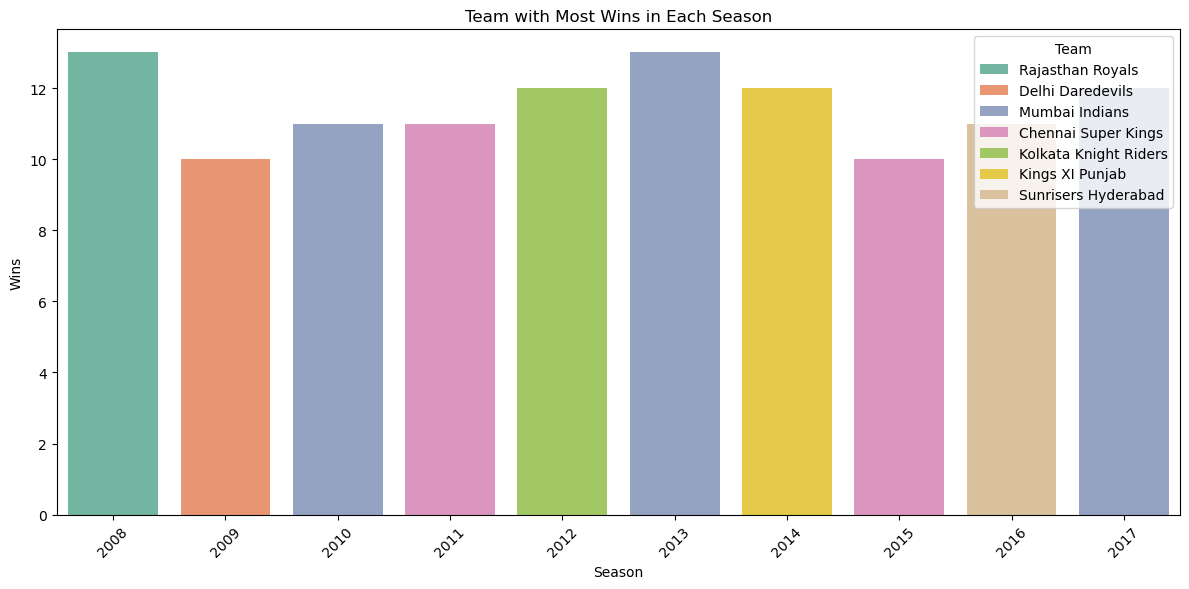

In [53]:
season_team_wins = ipl.groupby(['season', 'winner']).size().reset_index(name='wins')
top_team_season = season_team_wins.loc[season_team_wins.groupby('season')['wins'].idxmax()]

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='wins', hue='winner', data=top_team_season, palette='Set2')
plt.title('Team with Most Wins in Each Season')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.tight_layout()
plt.show()

🎯 Powerplay Performance (Overs 1–6)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\825823618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_powerplay_runs.values, y=team_powerplay_runs.index, palette='YlGnBu')


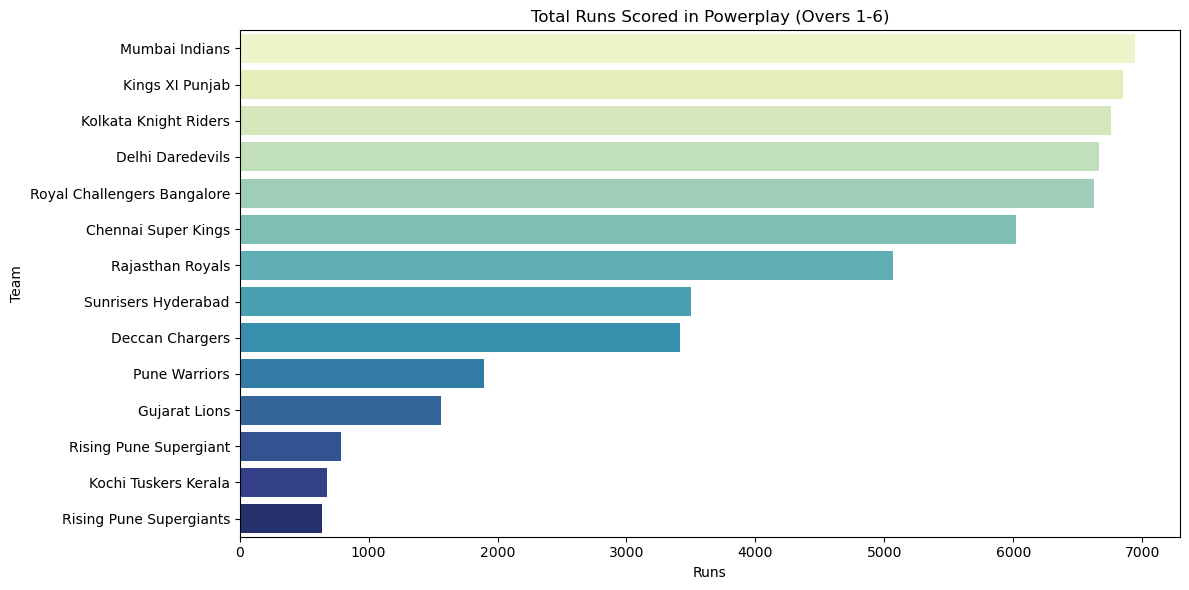

In [54]:
# Filter for powerplay overs
powerplay = deliveries[deliveries['over'] <= 6]

team_powerplay_runs = powerplay.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=team_powerplay_runs.values, y=team_powerplay_runs.index, palette='YlGnBu')
plt.title('Total Runs Scored in Powerplay (Overs 1-6)')
plt.xlabel('Runs')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

👥 Player vs Team – Virat Kohli's runs against each opponent

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\856435235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_vs_team.values, y=runs_vs_team.index, palette='muted')


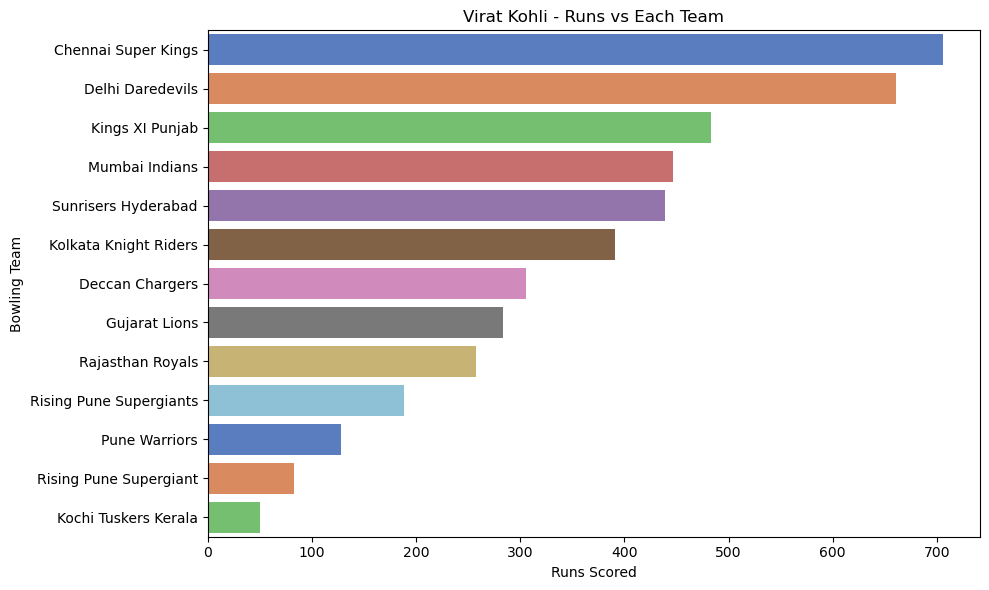

In [55]:
kohli_vs_team = deliveries[deliveries['batsman'] == 'V Kohli']
runs_vs_team = kohli_vs_team.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=runs_vs_team.values, y=runs_vs_team.index, palette='muted')
plt.title('Virat Kohli - Runs vs Each Team')
plt.xlabel('Runs Scored')
plt.ylabel('Bowling Team')
plt.tight_layout()
plt.show()

📈 Season-wise Total Runs Scored in the Tournament

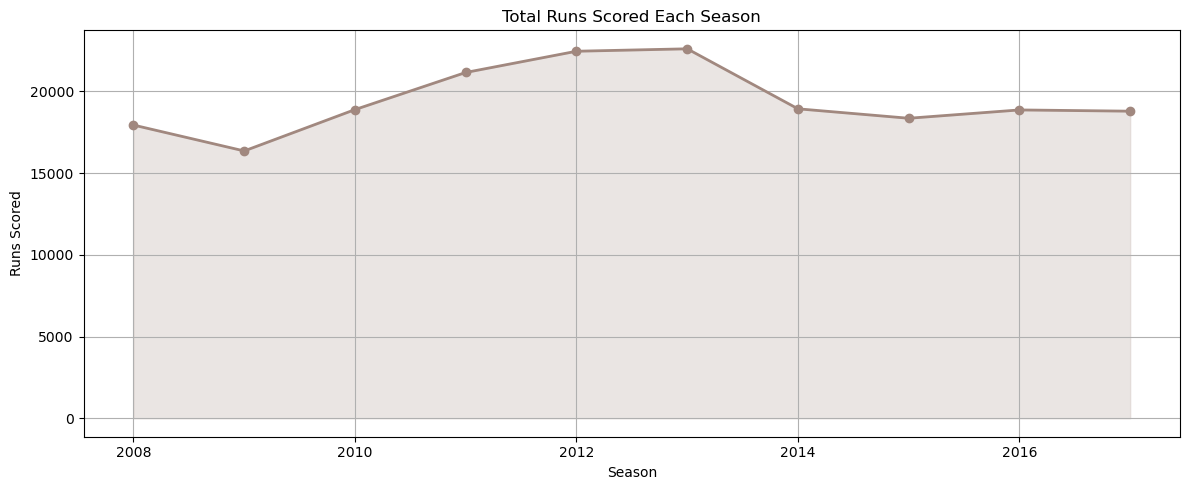

In [56]:
match_total_runs = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
match_total = match_total_runs.merge(ipl[['id', 'season']], left_on='match_id', right_on='id')

season_total_runs = match_total.groupby('season')['total_runs'].sum()

plt.figure(figsize=(12, 5))
plt.plot(season_total_runs.index, season_total_runs.values, marker='o',
         color="#a1887f", linestyle='-', linewidth=2)
plt.fill_between(season_total_runs.index, season_total_runs.values, color="#d7ccc8", alpha=0.5)
plt.title('Total Runs Scored Each Season')
plt.xlabel('Season')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Compare Batsmen: Rohit Sharma vs David Warner

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\2081644271.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runs.index, y=avg_runs.values, palette='pastel')


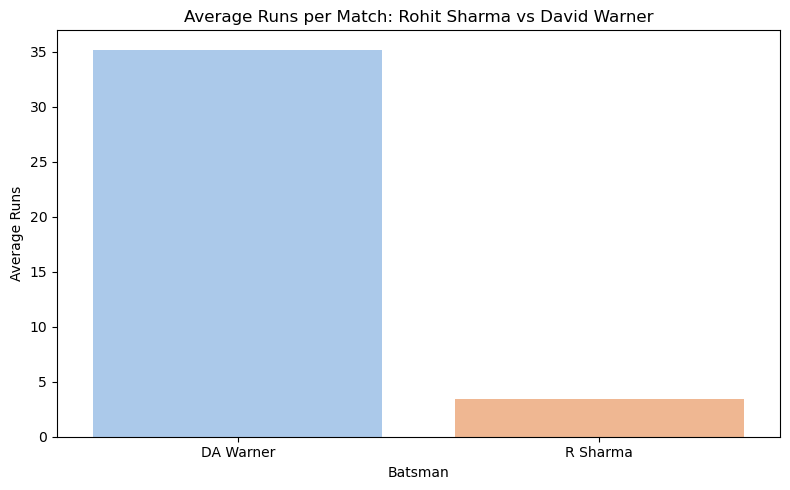

In [57]:
batsmen = ['R Sharma', 'DA Warner']
comparison = deliveries[deliveries['batsman'].isin(batsmen)]

runs_comparison = comparison.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()
avg_runs = runs_comparison.groupby('batsman')['batsman_runs'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_runs.index, y=avg_runs.values, palette='pastel')
plt.title('Average Runs per Match: Rohit Sharma vs David Warner')
plt.xlabel('Batsman')
plt.ylabel('Average Runs')
plt.tight_layout()
plt.show()

⚾ Average Runs Scored per Over in IPL

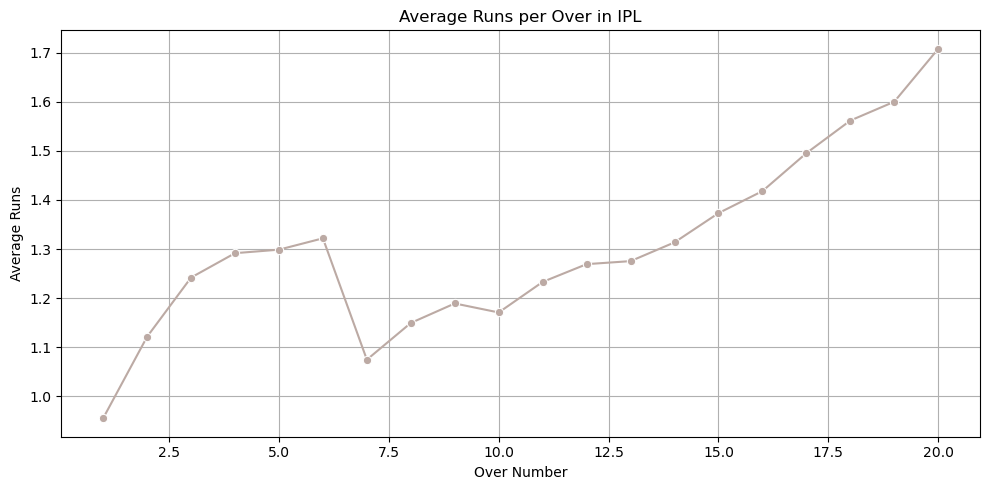

In [58]:
over_avg_runs = deliveries.groupby('over')['total_runs'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=over_avg_runs.index, y=over_avg_runs.values, marker='o', color='#bcaaa4')
plt.title('Average Runs per Over in IPL')
plt.xlabel('Over Number')
plt.ylabel('Average Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Top 10 Economical Bowlers (min 300 balls bowled)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\2309031654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=economy_rate.values, y=economy_rate.index, palette="Blues_d")


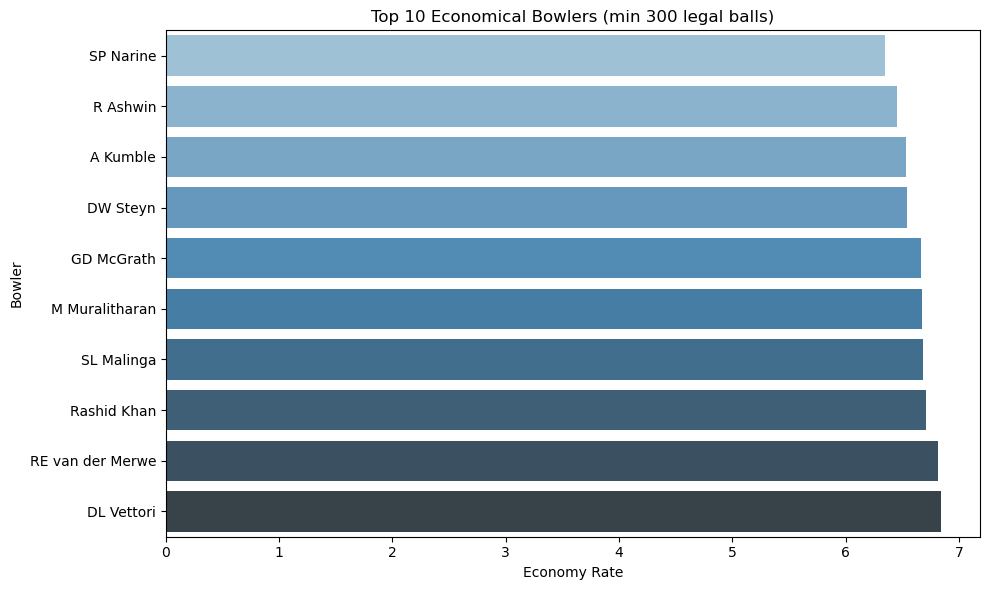

In [59]:
# Filter legal deliveries (exclude wides and no-balls)
legal_deliveries = deliveries[(deliveries['wide_runs'] == 0) & (deliveries['noball_runs'] == 0)]

# Balls and runs per bowler
balls_bowled = legal_deliveries.groupby('bowler').size()
runs_conceded = legal_deliveries.groupby('bowler')['total_runs'].sum()

# Economy rate = (total runs / total balls) * 6
economy_rate = (runs_conceded / balls_bowled) * 6
economy_rate = economy_rate[balls_bowled >= 300].sort_values().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=economy_rate.values, y=economy_rate.index, palette="Blues_d")
plt.title('Top 10 Economical Bowlers (min 300 legal balls)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

🏟️ Home vs Away Team Win Count

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\2540515306.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home Wins', 'Away Wins'], y=[home_wins, away_wins], palette=["#bcaaa4", "#a1887f"])


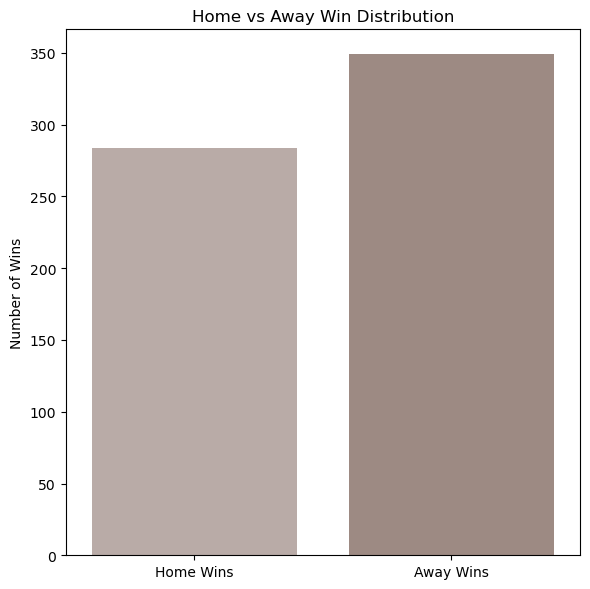

In [60]:
# Assuming 'team1' plays at home
ipl['home_win'] = ipl['team1'] == ipl['winner']
ipl['away_win'] = ipl['team2'] == ipl['winner']

home_wins = ipl['home_win'].sum()
away_wins = ipl['away_win'].sum()

plt.figure(figsize=(6, 6))
sns.barplot(x=['Home Wins', 'Away Wins'], y=[home_wins, away_wins], palette=["#bcaaa4", "#a1887f"])
plt.title('Home vs Away Win Distribution')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

🎯 Super Over Stats – Who scored the most in Super Overs?

C:\Users\Yahya\AppData\Local\Temp\ipykernel_12176\38692611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=super_over_scores.values, y=super_over_scores.index, palette='coolwarm')


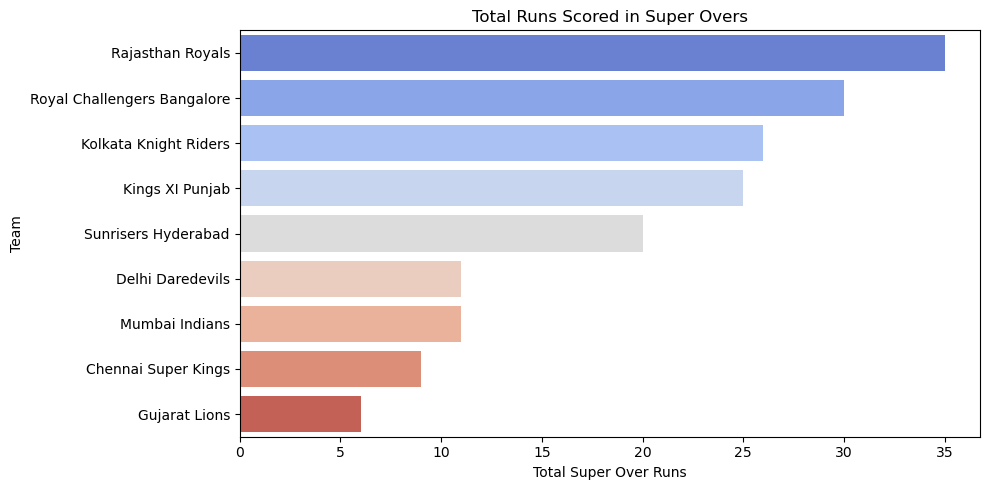

In [61]:
super_over_deliveries = deliveries[deliveries['is_super_over'] == 1]

super_over_scores = super_over_deliveries.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=super_over_scores.values, y=super_over_scores.index, palette='coolwarm')
plt.title('Total Runs Scored in Super Overs')
plt.xlabel('Total Super Over Runs')
plt.ylabel('Team')
plt.tight_layout()
plt.show()